In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling
import glob
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Reading & Cleaning Data

In [2]:
path = r'Data1'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['city'] = filename 
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame['city'] = frame['city'].str.replace('Data1/','')

In [4]:
frame['city'] = frame['city'].str.replace('.csv','')

In [5]:
frame

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,179,7,24,2019-03-16,0.17,3,167,Austin
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0,Austin
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,125,2,535,2020-07-12,3.83,1,365,Austin
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,20,2012-05-24,0.14,2,83,Austin
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,257,2019-11-03,2.03,1,89,Austin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131208,44807522,Designer Gramercy Studio Townhouse by UNSQ,12941925,Brian,Manhattan,Gramercy,40.73433,-73.98383,Entire home/apt,145,7,0,NaN,NaN,1,164,NewYorkCity
131209,44807786,Cozy & comfy apt in the heart of Inwood Manhattan,284790520,Salar,Manhattan,Washington Heights,40.85820,-73.92733,Entire home/apt,87,6,0,NaN,NaN,2,85,NewYorkCity
131210,44811717,Comfortable safe environment 24hr security camera,362453686,Nicole,Brooklyn,East Flatbush,40.65399,-73.93287,Private room,59,3,0,NaN,NaN,1,90,NewYorkCity
131211,44814944,Upper West Side studio 86th Street,4039777,Fernando,Manhattan,Upper West Side,40.78731,-73.97029,Entire home/apt,80,30,0,NaN,NaN,1,113,NewYorkCity


## EDA

In [6]:
profile = pandas_profiling.ProfileReport(frame, title="Airbnb Profiling")

In [7]:
profile.to_file("index.html")

In [8]:
frame['neighbourhood'] = frame['neighbourhood'].astype('object')

In [9]:
frame['name'] = frame['name'].fillna('') #For the wordcloud

In [10]:
columns_to_drop = ['host_name','neighbourhood_group','last_review']

In [11]:
frame = frame.drop(columns_to_drop, axis=1)

In [12]:
frame.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.312130e+05,1.312130e+05,131213.000000,131213.000000,131213.000000,1.312130e+05,131213.000000,102262.000000,131213.000000,131213.000000
mean,2.457800e+07,8.899451e+07,37.256777,-95.595506,202.526952,7.731466e+02,32.413404,1.325529,12.596732,143.853383
std,1.352328e+07,9.912676e+07,3.844449,20.521879,582.140088,2.760651e+05,61.997793,1.640436,51.832310,142.514522
min,1.090000e+02,2.300000e+01,30.108560,-122.511630,0.000000,1.000000e+00,0.000000,0.010000,1.000000,0.000000
25%,1.354786e+07,1.097539e+07,34.015440,-118.241470,70.000000,1.000000e+00,1.000000,0.190000,1.000000,0.000000
50%,2.454193e+07,4.520248e+07,38.902000,-97.713660,110.000000,3.000000e+00,7.000000,0.670000,1.000000,89.000000
75%,3.728034e+07,1.404770e+08,40.725460,-73.968380,185.000000,7.000000e+00,35.000000,1.930000,4.000000,302.000000
max,4.520870e+07,3.651163e+08,42.393760,-70.995950,24999.000000,1.000000e+08,951.000000,46.240000,634.000000,365.000000


In [13]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131213 entries, 0 to 131212
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              131213 non-null  int64  
 1   name                            131213 non-null  object 
 2   host_id                         131213 non-null  int64  
 3   neighbourhood                   131213 non-null  object 
 4   latitude                        131213 non-null  float64
 5   longitude                       131213 non-null  float64
 6   room_type                       131213 non-null  object 
 7   price                           131213 non-null  int64  
 8   minimum_nights                  131213 non-null  int64  
 9   number_of_reviews               131213 non-null  int64  
 10  reviews_per_month               102262 non-null  float64
 11  calculated_host_listings_count  131213 non-null  int64  
 12  availability_365

In [14]:
frame = frame.fillna(0)

In [15]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131213 entries, 0 to 131212
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              131213 non-null  int64  
 1   name                            131213 non-null  object 
 2   host_id                         131213 non-null  int64  
 3   neighbourhood                   131213 non-null  object 
 4   latitude                        131213 non-null  float64
 5   longitude                       131213 non-null  float64
 6   room_type                       131213 non-null  object 
 7   price                           131213 non-null  int64  
 8   minimum_nights                  131213 non-null  int64  
 9   number_of_reviews               131213 non-null  int64  
 10  reviews_per_month               131213 non-null  float64
 11  calculated_host_listings_count  131213 non-null  int64  
 12  availability_365

## Data wrangling

In [16]:
count_by_city = frame\
                .groupby(['city','neighbourhood'])\
                .count()\
                .sort_values(by = 'id', ascending = False)\
                >= 50

In [17]:
mask = pd.DataFrame(count_by_city)

In [18]:
relevant_neighbourhoods = list(set(mask[mask['id'] == True].index))

In [19]:
data_n = []
for neighbourhood in relevant_neighbourhoods:
    criteria = (frame['city'] == neighbourhood[0]) & (frame['neighbourhood'] == neighbourhood[1])
    aux = frame[criteria]
    data_n.append(aux)
data = pd.concat(data_n,axis=0)

In [20]:
data.groupby(['city','neighbourhood']).count().sort_values(by='id',ascending = False)

id  name  host_id  latitude  longitude  \
city         neighbourhood                                                    
NewYorkCity  Williamsburg          3486  3486     3486      3486       3486   
             Bedford-Stuyvesant    3438  3438     3438      3438       3438   
             Harlem                2503  2503     2503      2503       2503   
             Bushwick              2225  2225     2225      2225       2225   
Austin       78704                 1891  1891     1891      1891       1891   
...                                 ...   ...      ...       ...        ...   
Denver       Washington Park West    50    50       50        50         50   
LosAngeles   Del Aire                50    50       50        50         50   
SanFrancisco Glen Park               50    50       50        50         50   
SanDiego     La Jolla Village        50    50       50        50         50   
Chicago      Austin                  50    50       50        50         50   

                                   room_type  price  minimum_nights  \
city         neighbourhood                                            
NewYorkCity  Williamsburg               3486   3486            3486   
             Bedford-Stuyvesant         3438   3438            3438   
             Harlem                     2503   2503            2503   
             Bushwick                   2225   2225            2225   
Austin       78704                      1891   1891            1891   
...                                      ...    ...             ...   
Denver       Washington Park West         50     50              50   
LosAngeles   Del Aire                     50     50              50   
SanFrancisco Glen Park                    50     50              50   
SanDiego     La Jolla Village             50     50              50   
Chicago      Austin                       50     50              50   

                                   number_of_reviews  reviews_per_month  \
city         neighbourhood                                                
NewYorkCity  Williamsburg                       3486               3486   
             Bedford-Stuyvesant                 3438               3438   
             Harlem                             2503               2503   
             Bushwick                           2225               2225   
Austin       78704                              1891               1891   
...                                              ...                ...   
Denver       Washington Park West                 50                 50   
LosAngeles   Del Aire                             50                 50   
SanFrancisco Glen Park                            50                 50   
SanDiego     La Jolla Village                     50                 50   
Chicago      Austin                               50                 50   

                                   calculated_host_listings_count  \
city         neighbourhood                                          
NewYorkCity  Williamsburg                                    3486   
             Bedford-Stuyvesant                              3438   
             Harlem                                          2503   
             Bushwick                                        2225   
Austin       78704                                           1891   
...                                                           ...   
Denver       Washington Park West                              50   
LosAngeles   Del Aire                                          50   
SanFrancisco Glen Park                                         50   
SanDiego     La Jolla Village                                  50   
Chicago      Austin                                            50   

                                   availability_365  
city         neighbourhood                           
NewYorkCity  Williamsburg                      3486  
             Bedford-Stuyvesant                34

## Visualization

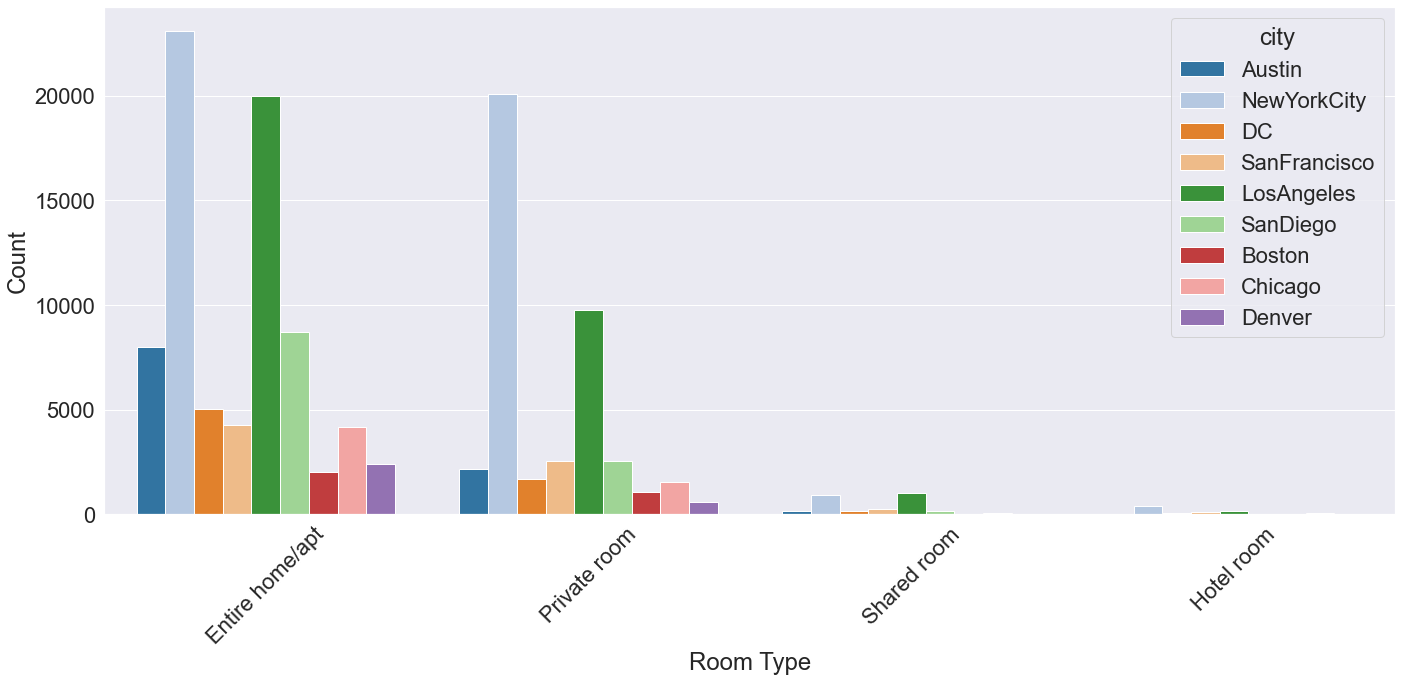

In [24]:
#Count plot
sns.set()
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid", font_scale=2)

chart = sns.countplot(x="room_type", data=data, hue='city', palette='tab20')

chart.set(xlabel='Room Type', ylabel='Count')

chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.tight_layout()

plt.savefig('img/room_count.png', dpi=300)

<Figure size 3600x1440 with 0 Axes>

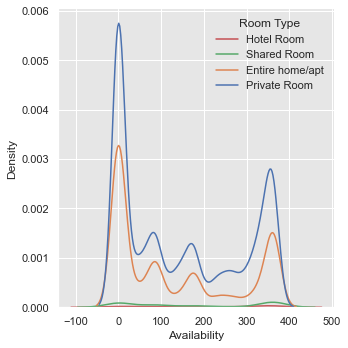

In [25]:
#Availability distribution
sns.set()
labels = ['Hotel Room', 'Shared Room', 'Entire home/apt', 'Private Room']
plt.figure(figsize=(50,20))

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

chart = sns.displot(data=data, x="availability_365", hue="room_type", kind="kde", legend=False)

chart.set(xlabel='Availability')

plt.legend(title='Room Type', loc='upper right', labels=labels, frameon = False)

plt.tight_layout()

plt.savefig('img/availability_dist.png', dpi=300)

In [26]:
#Mean prices by city

data_plot1 = data.groupby(['city'])\
                 .mean()[['price']]\
                 .sort_values(by = 'price', ascending = False).reset_index()
data_plot1

,city,price
0,SanDiego,332.493534
1,Austin,272.832670
2,SanFrancisco,247.324036
3,LosAngeles,231.156351
4,DC,180.249097
5,Denver,171.982617
6,Boston,168.569098
7,Chicago,166.702698
8,NewYorkCity,150.023647


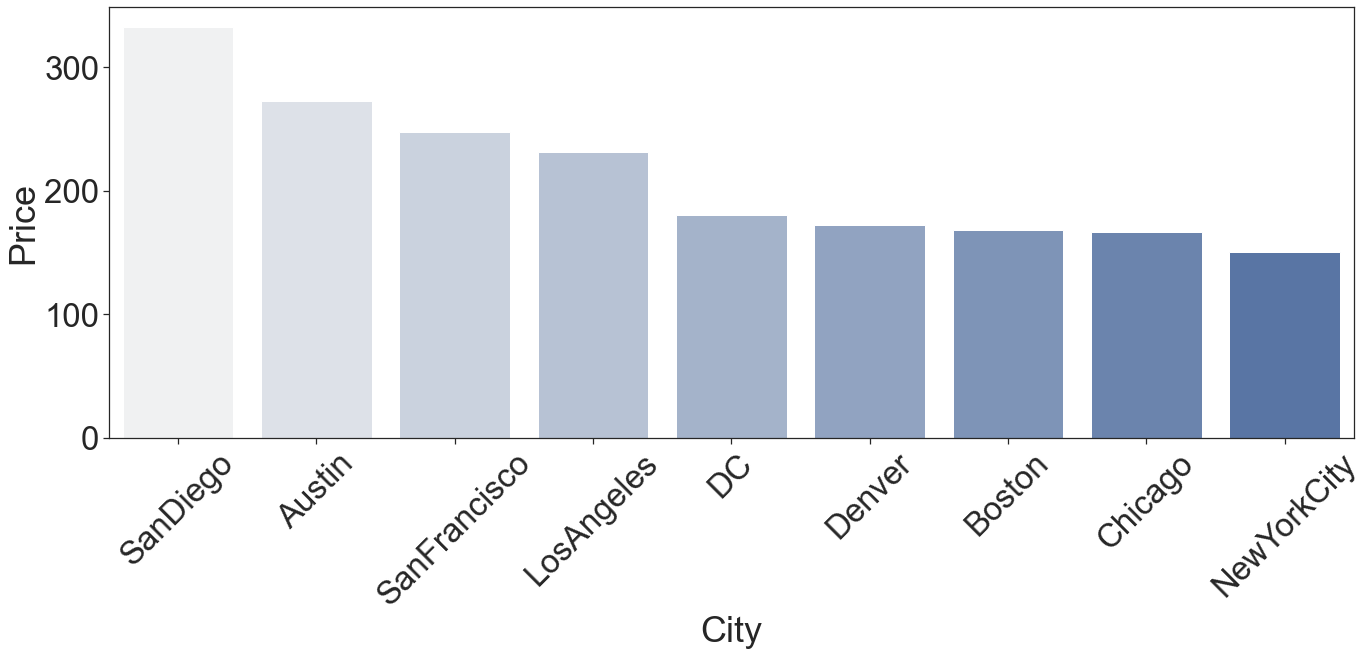

In [28]:
sns.set()
plt.figure(figsize=(20,10))
sns.set_theme(style="ticks",font_scale=3)

chart = sns.barplot(data=data_plot1, x='city',y='price', palette="light:b")
chart.set(xlabel='City', ylabel='Price')

chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.tight_layout()

plt.savefig('img/avg_prices.png',dpi=300)

In [29]:
#Most expensive properties

data_plot2 = data[data['price'] > 1000]

data_plot2

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
4104,20679507,"Two Houses in One + hot tub, arcade",22738209,78728,30.44559,-97.68056,Entire home/apt,1200,2,3,0.10,8,145,Austin
36426,16379151,Luxurious Urban Oasis,107278901,"Takoma, Brightwood, Manor Park",38.96885,-77.03280,Entire home/apt,1400,2,0,0.00,1,179,DC
27649,1212746,Big Flat/3 BR/2-Bath/Great District/Near Subway,1237762,Castro/Upper Market,37.76018,-122.44020,Entire home/apt,1060,3,101,1.18,2,179,SanFrancisco
27803,1777429,Modern Luxury - 4bd + studio *,648553,Castro/Upper Market,37.75700,-122.42907,Entire home/apt,1450,5,11,0.22,2,0,SanFrancisco
28924,9990865,Huge 3-Bdrm 2-Bath Flat Great Neighborhood,40419188,Castro/Upper Market,37.76088,-122.43916,Entire home/apt,1092,3,55,0.97,2,179,SanFrancisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46682,18311038,Historic Church Home in Logan Square,28054964,Logan Square,41.92575,-87.69514,Entire home/apt,1036,2,10,0.25,1,359,Chicago
47714,25324512,Cute Studio Apartment – July Sublet,73190322,Logan Square,41.92968,-87.71118,Entire home/apt,1095,30,0,0.00,1,90,Chicago
48804,33376719,One Of A Kind Luxe Logan Square Home 8BR/5.5BA...,145980569,Logan Square,41.91759,-87.71215,Entire home/apt,1538,3,13,0.90,4,109,Chicago
20802,24353011,TEST LISTING - DO NOT BOOK,1743084,Memorial,32.70593,-117.14602,Entire home/apt,5000,1,0,0.00,1,0,SanDiego


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 45.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 62.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

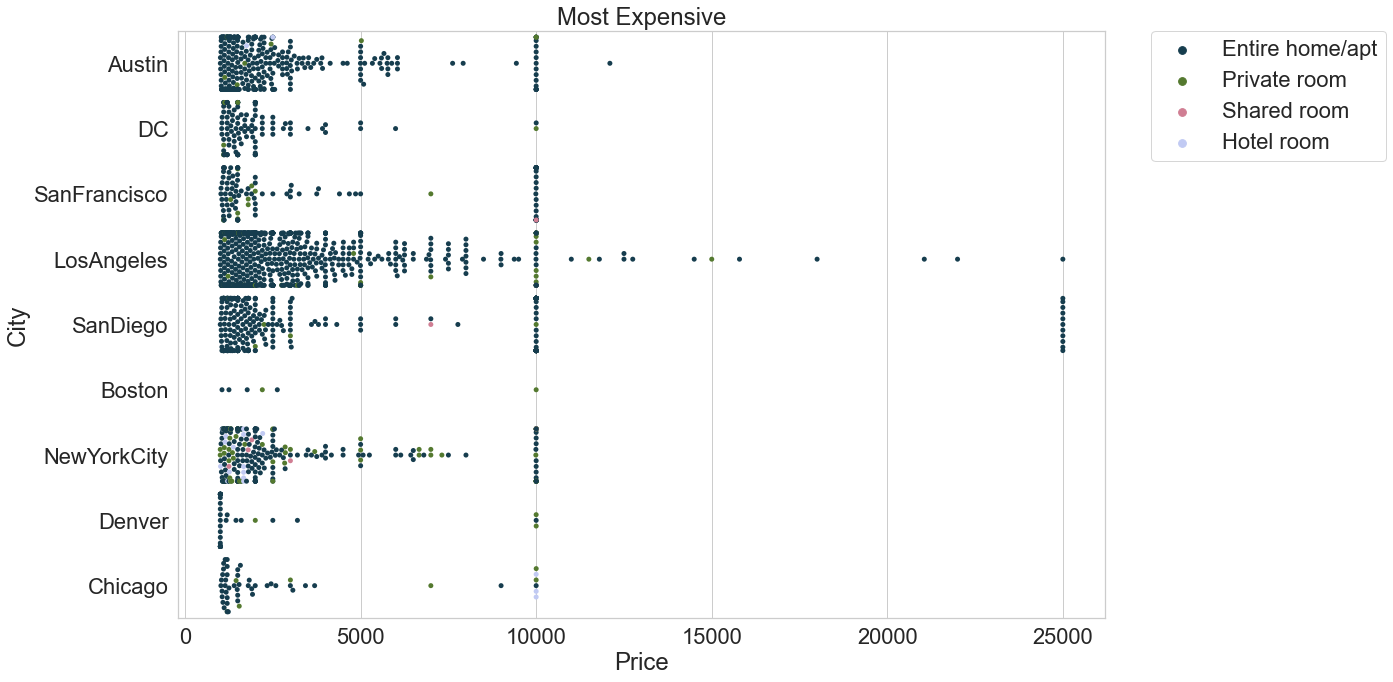

In [30]:
sns.set()
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid", font_scale=2)

chart = sns.swarmplot(x="price", y="city", hue="room_type",
              data=data_plot2, palette="cubehelix")


chart.set(xlabel='Price', ylabel='City', title = 'Most Expensive')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()




plt.savefig('img/most_expensive.png',dpi=300)

In [46]:
#Cheapest
data_plot3 = data[data['price'] < 500]

data_plot3

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
94,228217,"3 bedroom house near lakes,ACL&SXSW",1182382,78728,30.45831,-97.68722,Entire home/apt,350,4,0,0.00,1,365,Austin
810,2665977,Charming upstairs loft.,13645041,78728,30.46117,-97.68298,Private room,90,2,0,0.00,1,365,Austin
1053,4340903,quaint and safe 1br apartment,22530745,78728,30.44250,-97.66967,Entire home/apt,39,2,4,0.69,1,0,Austin
1064,4431533,Cosy and Open 4/2 with Loft on Greenbelt,22738209,78728,30.44667,-97.68241,Entire home/apt,389,4,4,0.06,8,150,Austin
1069,4464432,Best Value in Austin! Adorable 3/2,22738209,78728,30.44656,-97.68459,Entire home/apt,199,3,4,0.06,8,329,Austin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26404,43118581,"1 BR/1 Bath (B), 3 min to DT San Diego w/ Netflix",182814009,Memorial,32.70510,-117.13878,Entire home/apt,60,1,14,4.57,3,10,SanDiego
26409,43126270,"1 BR/1 Bath (C), 3 min to DT San Diego w/ Netflix",182814009,Memorial,32.70348,-117.13774,Entire home/apt,55,1,12,3.60,3,20,SanDiego
26571,43440711,REDUCED RATES! PERFECT 3br Abode Near Downtown,31991928,Memorial,32.70139,-117.12581,Entire home/apt,160,1,4,1.88,5,80,SanDiego
26669,43624123,San Diego Coffee stroll Lane !,71747204,Memorial,32.69808,-117.13514,Private room,400,3,0,0.00,4,89,SanDiego


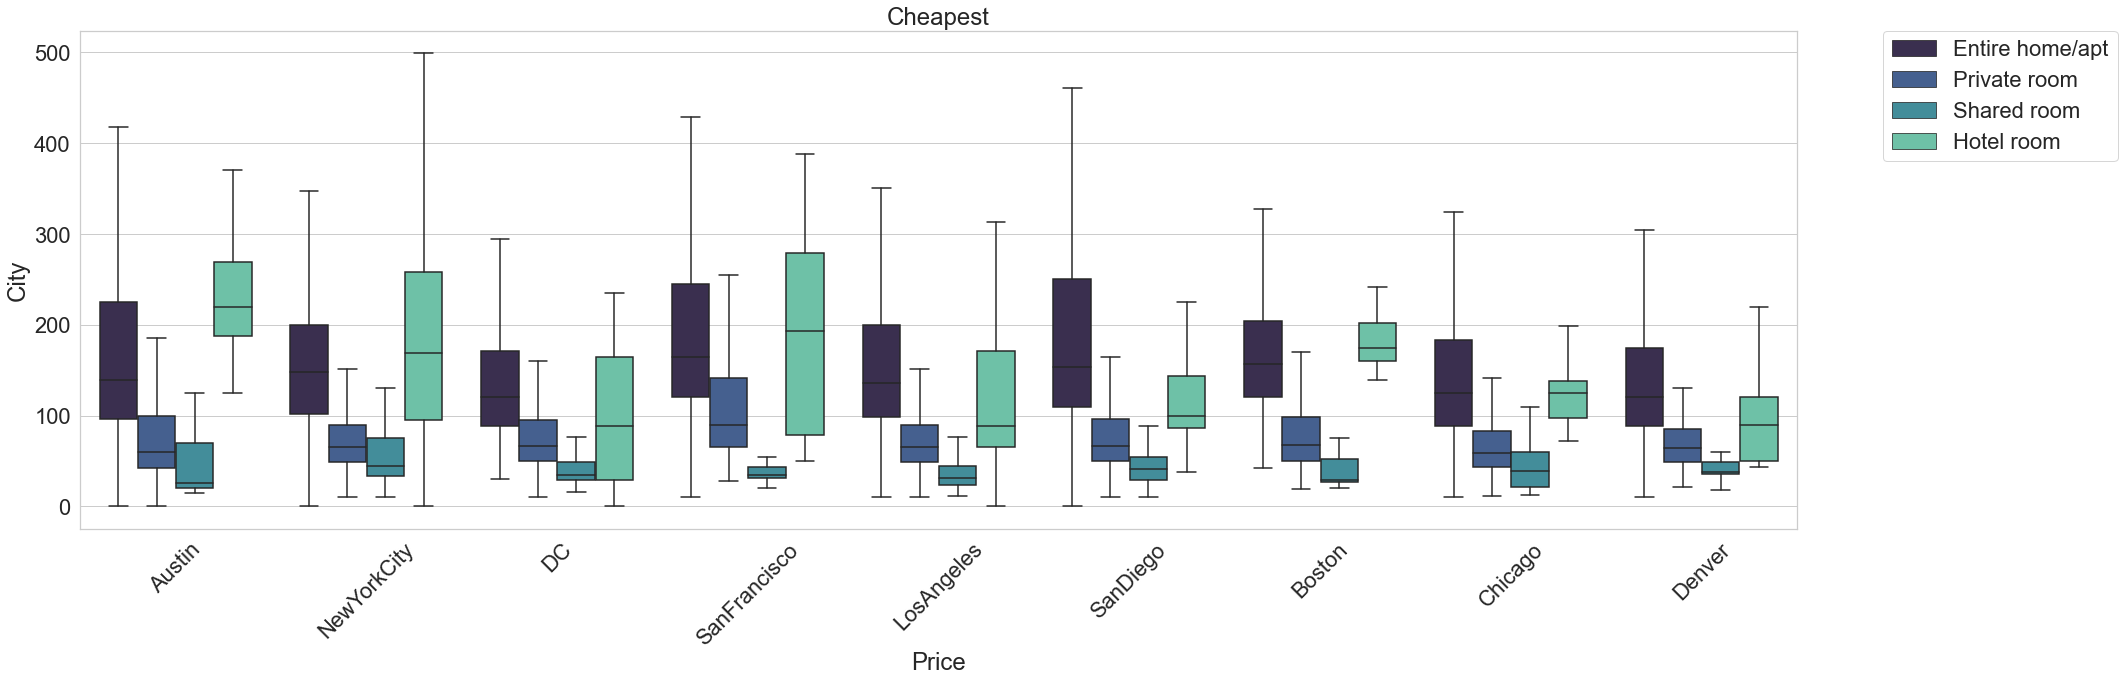

In [50]:
sns.set()
plt.figure(figsize=(30,10))
sns.set_theme(style="whitegrid", font_scale=2)

chart = sns.boxplot(x="city", y="price", hue="room_type",
              data=data_plot3, palette="mako", showfliers = False)


chart.set(xlabel='Price', ylabel='City', title = 'Cheapest')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.tight_layout()




plt.savefig('img/cheapest.png',dpi=300)

## Analytics

In [31]:
limits = {'Chicago': [41.648288,-87.932061,42,-87.51],\
          'NewYorkCity': [40.51,-74.258,40.9,-73.69],\
          'Boston':[42.27527655,-71.11553192,42.39481197,-71.01425171]}

In [32]:
cities = ['NewYorkCity', 'Chicago','Boston']

In [51]:
city = 'Boston'

<AxesSubplot:>

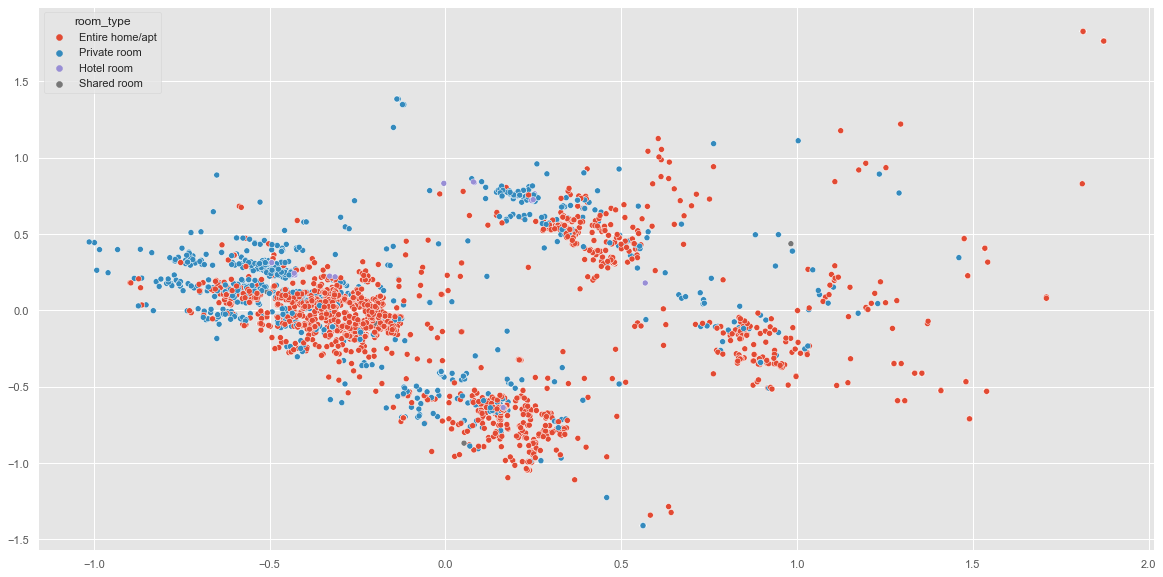

In [52]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data[data['city'] == city]['name'])
X = X.toarray()
pca = PCA(n_components=2)
pca.fit(X)
projections = pca.transform(X)
x = projections[:,0]
y = projections[:,1]

sns.set()
plt.style.use('ggplot')
plt.figure( figsize = (20,10) )
sns.scatterplot(x=x,y=y, hue=data[data['city'] == city]['room_type'])

In [53]:
clusterer = GaussianMixture(n_components=3)
clusterer.fit(projections)

GaussianMixture(n_components=3)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

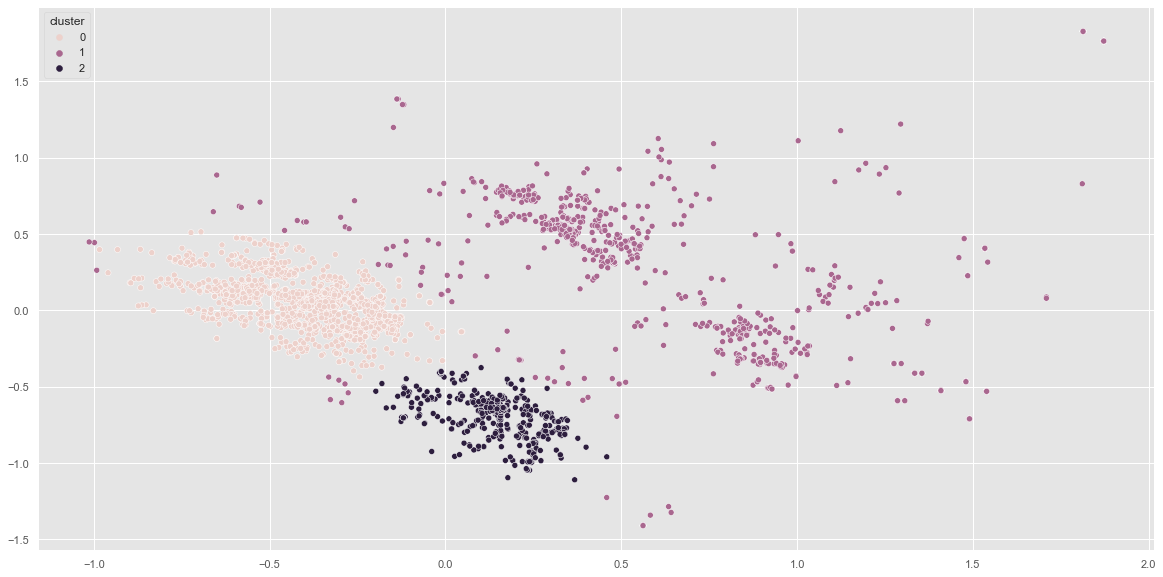

In [54]:
city_info = data[data['city'] == city]
city_info['cluster'] = clusterer.predict(projections)

sns.set()
plt.style.use('ggplot')
plt.figure( figsize = (20,10) )
sns.scatterplot(x=x,y=y, hue=city_info['cluster'])

In [55]:
city_info.groupby('cluster')[['price']].mean()

,price
cluster,
0,165.251791
1,164.621469
2,190.903756


In [56]:
relevant_clusters = [2,1]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<Figure size 432x288 with 0 Axes>

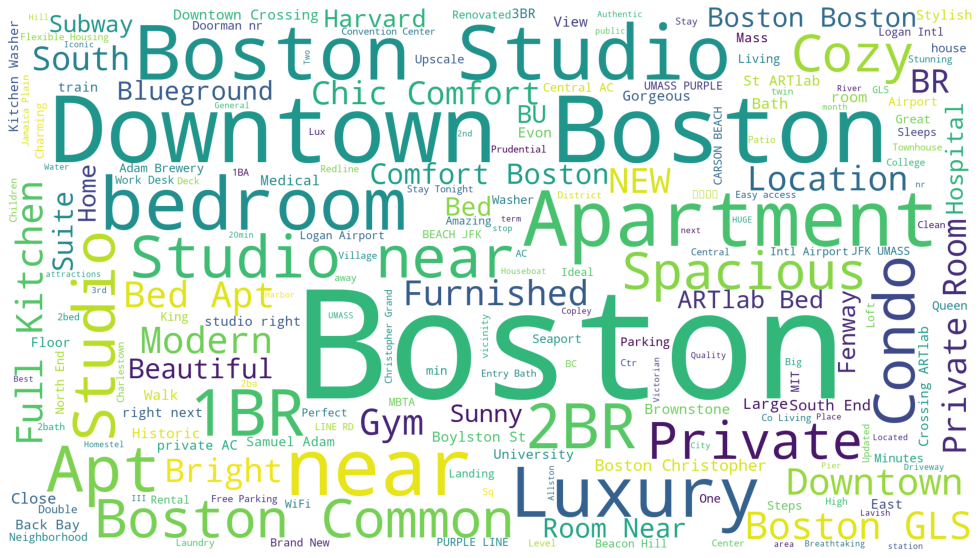

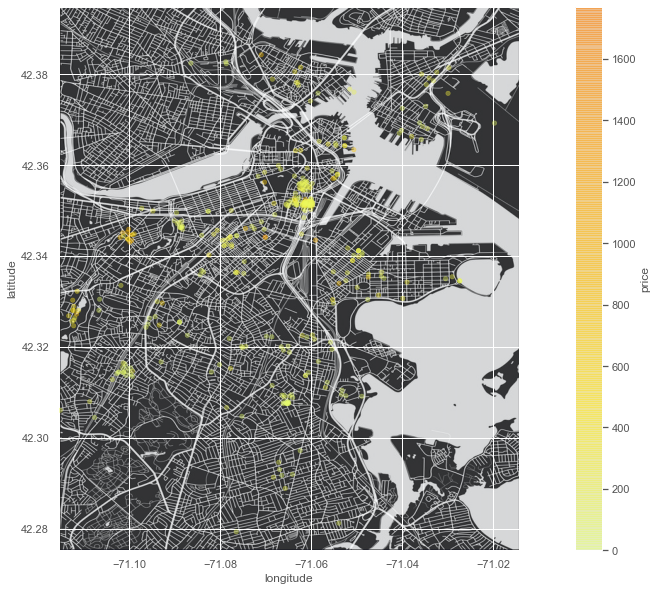

<Figure size 432x288 with 0 Axes>

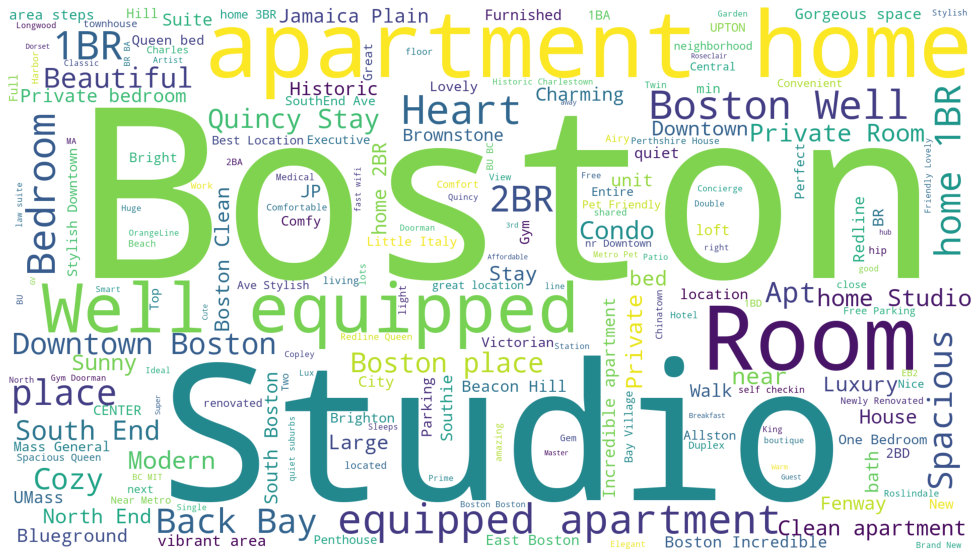

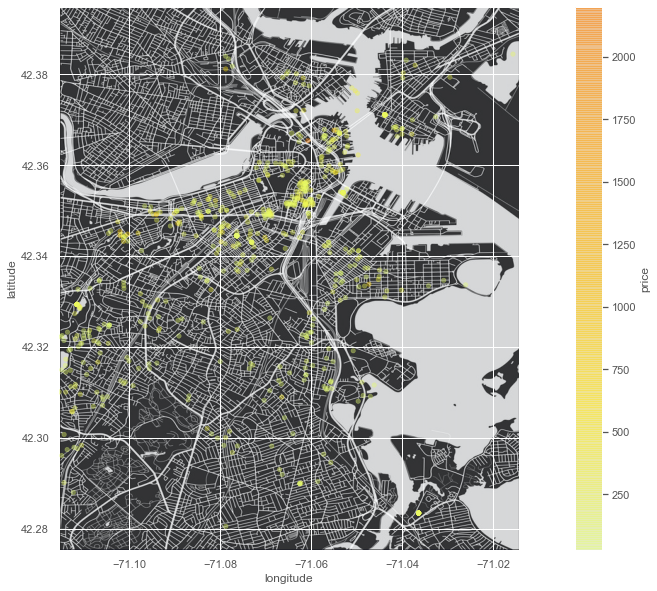

In [57]:
city_info['name'] = city_info['name'].astype('object')
for cluster in relevant_clusters:
    plt.figure()
    plt.style.use('ggplot')
    df = city_info[city_info['cluster'] == cluster]
    plt.subplots(figsize=(20,10))
    wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df['name']))
    path = 'img/word_cluster' + city + str(cluster) + '.png'
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig(path)
    
    plt.figure(figsize=(20,10))
    max_lat = limits[city][2]
    min_lat = limits[city][0]
    max_lon = limits[city][3]
    min_lon = limits[city][1]
    img_map = 'maps/' + city + 'map.jpg'
    img=plt.imread(img_map)
    extent=[min_lon, max_lon, min_lat,max_lat]
    plt.imshow(img,zorder=0,extent=extent)
    ax=plt.gca()
    city_info[(city_info['cluster'] == cluster) & \
         (city_info['longitude'] > min_lon) & \
         (city_info['longitude'] < max_lon) & \
         (city_info['latitude'] > min_lat) & \
         (city_info['latitude'] < max_lat)].plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax, 
          cmap=plt.get_cmap('Wistia'), colorbar=True, alpha=0.4, zorder=5)
    
    
    
    path = 'img/map_cluster' + city + str(cluster) + '.png'
    plt.savefig(path)
    plt.show()